In [32]:
import numpy as np
import pandas as pd

In [33]:
df = pd.read_csv("insurance.csv")

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Apa itu encoding ?
jadi, encoding adalah perubahan data yang bersifat kategorikal yakni object / string yang diubah mendadi numerik (int / float)

untuk encoding sendiri terdapat beberapa jenis yaitu label encoding dan one hot encoding
- label encoding

    yaitu perubahan antara kategorikal diubah menjadi urutan data (seperti index pada list)
    misal ada data string yang punya 3 unique value yaitu murid, guru, karyawan jika diubah menjadi label data maka akan jadi
    value yang sesuai dengan urutannya bisa menjadi seperti ini (murid = 0, guru = 1, karyawan = 2)
    maka jika ada data baris kolom yang memiliki value murid maka akan dirubah menjadi 0 dan jika ada data yag valuenya itu
    karyawan maka akan menjadi 2

In [34]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

untuk contoh nya kita rubah region menjadi label encoding dengan urutan akan seperti ini


'southwest' = 1, 'southeast' = 2, 'northwest' = 3, 'northeast' = 4

In [35]:
df['region_numerik'] = df.region.map({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})

df.head()

,age,sex,bmi,children,smoker,region,charges,region_numerik
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,2
2,28,male,33.000,3,no,southeast,4449.46200,2
3,33,male,22.705,0,no,northwest,21984.47061,3
4,32,male,28.880,0,no,northwest,3866.85520,3


- One-hot-encoding / Dummy Variable

    yaitu teknik pengubahan menjadi value 0 = benar dan 1 = salah dan teknik ini membuat banyaknya kolom baru sesuai dengan 
    banyaknya tipe kategori. Setiap kolom kategori akan bernilai 1 dan 0 dan setiap data pasti ada 1 kolom kategori yang bernilai 1

contohnya kita membuat one-hot-encoding untuk menggantikan data kategori jenis kelamin, jumlah kategori nya hanya ada 2 yakni male dan female. 

jika ada data bernilai male maka kolom sex_male akan bernilai 1 dan kolom sex_female akan bernilai 0.

jika ada data bernilai female maka kolom sex_male akan bernilai 0 dan kolom sex_female akan bernilai 1.

In [36]:
pd.get_dummies(df, columns=['sex'])
# bisa ditambah parameter untuk prefix_sep = "_+" untuk penamaan kolom defaulth "_"

,age,bmi,children,smoker,region,charges,region_numerik,sex_female,sex_male
0,19,27.900,0,yes,southwest,16884.92400,1,True,False
1,18,33.770,1,no,southeast,1725.55230,2,False,True
2,28,33.000,3,no,southeast,4449.46200,2,False,True
3,33,22.705,0,no,northwest,21984.47061,3,False,True
4,32,28.880,0,no,northwest,3866.85520,3,False,True
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,3,False,True
1334,18,31.920,0,no,northeast,2205.98080,4,True,False
1335,18,36.850,0,no,southeast,1629.83350,2,True,False
1336,21,25.800,0,no,southwest,2007.94500,1,True,False


Apa itu binning ? 

Binning adalah perubahan data yang numerik menjadi data kategorikal 

contoh kasus kita ingin mengubah umur yang bentuknya numerik menjadi kategorikal seperti anak-anak, remaja, dewasa, lansia

<Axes: >

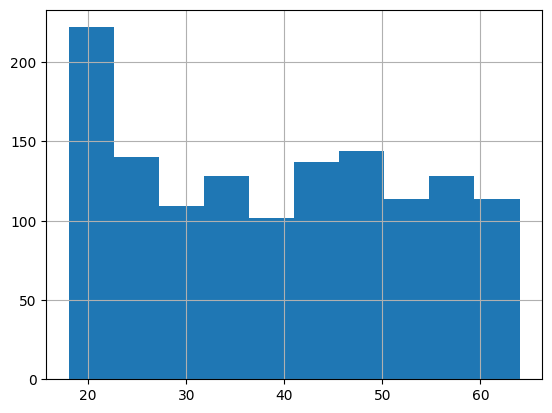

In [37]:
df.age.hist(bins=10)

 isi parameter 
 - kolom yang ingin diubah (df.bmi)
 - bins => maxValue / 3 => membagi kategori menjadi 3 secara rata
 - bins => bisa isi list dari numerik kategori misal 0-10, 11-30, 31-50 akan jadi seperti ini [0, 10, 30, 50]
 - labels => isi dari kategorinya (['low', 'medium', 'high'])

In [40]:

df["bmi_category"] = pd.cut(df.bmi, bins=[0, 10, 18, 40, df.bmi.max()], labels=['anak', 'remaja', 'dewasa', 'lansia'])

df.head()

,age,sex,bmi,children,smoker,region,charges,region_numerik,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,1,dewasa
1,18,male,33.770,1,no,southeast,1725.55230,2,dewasa
2,28,male,33.000,3,no,southeast,4449.46200,2,dewasa
3,33,male,22.705,0,no,northwest,21984.47061,3,dewasa
4,32,male,28.880,0,no,northwest,3866.85520,3,dewasa


In [ ]:
df["age_category"] = pd.cut(df.age, bins=3, labels=['low', 'medium', 'high'])

df.head()